<a href="https://colab.research.google.com/github/Namsik-Yoon/pytorch_basic/blob/master/4.%20%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4%20%ED%9A%8C%EA%B7%80(Softmax_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. 소프트맥스 회귀(Softmax Regression)

이번 챕터에서는 3개 이상의 선택지로부터 1개를 선택하는 문제인 다중 클래스 분류(Multi-Class classification)를 풀기 위한 소프트맥스 회귀에 대해서 학습합니다.

## 4.1 원-핫 인코딩(One-Hot Encoding)

이번 챕터에서는 범주형 데이터를 처리할 때 레이블을 표현하는 방법인 원-핫 인코딩에 대해서 배워봅시다.

### 4.1.1 원-핫 인코딩(One-hot encoding)이란?

원-핫 인코딩은 선택해야 하는 선택지의 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소에는 1, 나머지 원소는 0의 값을 가지도록 하는 표현 방법입니다. 예를 들어 강아지, 고양이, 냉장고라는 3개의 선택지가 있다고 해보겠습니다.

원-핫 인코딩을 하기 위해서는 우선 각 선택지에 순차적으로 정수 인덱스를 부여합니다. 임의로 강아지는 0번 인덱스, 고양이는 1번 인덱스, 냉장고는 2번 인덱스를 부여하였다고 해봅시다. 이때 각 선택지에 대해서 원-핫 인코딩이 된 벡터는 다음과 같습니다.

강아지 = [1, 0, 0]

고양이 = [0, 1, 0]

냉장고 = [0, 0, 1]

총 선택지는 3개였으므로 위 벡터들은 전부 3차원의 벡터가 되었습니다. 그리고 각 선택지의 벡터들을 보면 해당 선택지의 인덱스에만 1의 값을 가지고, 나머지 원소들은 0의 값을 가집니다. 예를 들어 고양이는 1번 인덱스였으므로 원-핫 인코딩으로 얻은 벡터에서 1번 인덱스만 1의 값을 가지는 것을 볼 수 있습니다.

이와 같이 원-핫 인코딩으로 표현된 벡터를 원-핫 벡터(one-hot vector)라고 합니다.

### 4.1.2 원-핫 벡터의 무작위성

꼭 실제값을 원-핫 벡터로 표현해야만 다중 클래스 분류 문제를 풀 수 있는 것은 아니지만, 대부분의 다중 클래스 분류 문제가 각 클래스 간의 관계가 균등하다는 점에서 원-핫 벡터는 이러한 점을 표현할 수 있는 적절한 표현 방법입니다.

다수의 클래스를 분류하는 문제에서는 이진 분류처럼 2개의 숫자 레이블이 아니라 클래스의 개수만큼 숫자 레이블이 필요합니다. 이때 직관적으로 생각해볼 수 있는 레이블링 방법은 분류해야 할 클래스 전체에 정수 인코딩을 하는 겁니다. 예를 들어서 분류해야 할 레이블이 {red, green, blue}와 같이 3개라면 각각 0, 1, 2로 레이블을 합니다. 또는 분류해야 할 클래스가 4개고 인덱스를 숫자 1부터 시작하고 싶다고 하면 {baby, child, adolescent, adult}라면 1, 2, 3, 4로 레이블을 해볼 수 있습니다. 그런데 일반적인 다중 클래스 분류 문제에서 레이블링 방법으로는 위와 같은 정수 인코딩이 아니라 원-핫 인코딩을 사용하는 것이 보다 클래스의 성질을 잘 표현하였다고 할 수 있습니다. 그 이유를 알아봅시다.

Banana, Tomato, Apple라는 3개의 클래스가 존재하는 문제가 있다고 해봅시다. 레이블은 정수 인코딩을 사용하여 각각 1, 2, 3을 부여하였습니다. 손실 함수로 선형 회귀 챕터에서 배운 평균 제곱 오차 MSE를 사용하면 정수 인코딩이 어떤 오해를 불러일으킬 수 있는지 확인할 수 있습니다. 아래의 식은 앞서 선형 회귀에서 배웠던 MSE를 다시 그대로 가져온 것입니다. $\hat{y}$는 예측값을 의미합니다.

$Loss\ function = \frac{1}{n} \sum_i^{n} \left(y_{i} - \hat{y_{i}}\right)^2$

직관적인 오차 크기 비교를 위해 평균을 구하는 수식은 제외하고 제곱 오차로만 판단해봅시다.

실제값이 Tomato일때 예측값이 Banana이었다면 제곱 오차는 다음과 같습니다.

$(2-1)^{2} = 1$

실제값이 Apple일때 예측값이 Banana이었다면 제곱 오차는 다음과 같습니다.

$(3-1)^{2} = 4$

즉, Banana과 Tomato 사이의 오차보다 Banana과 Apple의 오차가 더 큽니다. 이는 기계에게 Banana가 Apple보다는 Tomato에 더 가깝다는 정보를 주는 것과 다름없습니다. 더 많은 클래스에 대해서 정수 인코딩을 수행했다고 해봅시다.

{Banana :1, Tomato :2, Apple :3, Strawberry :4, ... Watermelon :10}

이 정수 인코딩은 Banana가 Watermelon보다는 Tomato에 더 가깝다는 의미를 담고 있습니다. 이는 사용자가 부여하고자 했던 정보가 아닙니다. 이러한 정수 인코딩의 순서 정보가 도움이 되는 분류 문제도 물론 있습니다. 바로 각 클래스가 순서의 의미를 갖고 있어서 회귀를 통해서 분류 문제를 풀 수 있는 경우입니다. 예를 들어 {baby, child, adolescent, adult}나 {1층, 2층, 3층, 4층}이나 {10대, 20대, 30대, 40대}와 같은 경우가 이에 해당됩니다. 하지만 일반적인 분류 문제에서는 각 클래스는 순서의 의미를 갖고 있지 않으므로 각 클래스 간의 오차는 균등한 것이 옳습니다. 정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배합니다.

아래는 세 개의 카테고리에 대해서 원-핫 인코딩을 통해서 레이블을 인코딩했을 때 각 클래스 간의 제곱 오차가 균등함을 보여줍니다.

$((1,0,0)-(0,1,0))^{2} = (1-0)^{2} + (0-1)^{2} + (0-0)^{2} = 2$

$((1,0,0)-(0,0,1))^{2} = (1-0)^{2} + (0-0)^{2} + (0-1)^{2} = 2$

다르게 표현하면 모든 클래스에 대해서 원-핫 인코딩을 통해 얻은 원-핫 벡터들은 모든 쌍에 대해서 유클리드 거리를 구해도 전부 유클리드 거리가 동일합니다. 원-핫 벡터는 이처럼 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현할 수 있습니다. 뒤에서 다시 언급되겠지만 이러한 원-핫 벡터의 관계의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점으로 언급되기도 합니다.

##4.2 소프트맥스 회귀(Softmax Regression) 이해하기

앞서 로지스틱 회귀를 통해 2개의 선택지 중에서 1개를 고르는 이진 분류(Binary Classification)를 풀어봤습니다. 이번 챕터에서는 소프트맥스 회귀를 통해 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류(Multi-Class Classification)를 실습해봅시다.

### 4.2.1 다중 클래스 분류(Multi-class Classification)

이진 분류가 두 개의 답 중 하나를 고르는 문제였다면, 세 개 이상의 답 중 하나를 고르는 문제를 다중 클래스 분류(Multi-class Classification)라고 합니다. 아래의 문제는 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이라는 4개의 특성(feature)로부터 setosa, versicolor, virginica라는 3개의 붓꽃 품종 중 어떤 품종인지를 예측하는 문제로 전형적인 다중 클래스 분류 문제입니다.

|SepalLengthCm$(x_1)$|SepalWidthCm$(x_2)$|PetalLengthCm$(x_3)$|PetalWidthCm$(x_4)$|Species$(y)$|
|---|---|---|---|---|
|5.1|3.5|1.4|0.2|setosa|
|4.9|3.0|1.4|0.2|setosa|
|5.8|2.6|4.0|1.2|versicolor|
|6.7|3.0|5.2|2.3|virginica|
|5.6|2.8|4.9|2.0|virginica|

위 붓꽃 품종 분류하기 문제를 어떻게 풀지 고민하기 위해 앞서 배운 로지스틱 회귀의 이진 분류를 복습해보겠습니다.

이번 챕터의 설명에서 입력은 $X$, 가중치는 $W$, 편향은 $B$, 출력은 $\hat{Y}$로 각 변수는 벡터 또는 행렬로 가정합니다.

*   $\hat{Y}$은 예측값이라는 의미를 가지고 있으므로 가설식에서 $H(X)$ 대신 사용되기도 합니다.



1) 로지스틱 회귀

로지스틱 회귀에서 시그모이드 함수는 예측값을 0과 1 사이의 값으로 만듭니다. 예를 들어 스팸 메일 분류기를 로지스틱 회귀로 구현하였을 때, 출력이 0.75이라면 이는 이메일이 스팸일 확률이 75%라는 의미가 됩니다. 반대로, 스팸 메일이 아닐 확률은 25%가 됩니다. 이 두 확률의 총 합은 1입니다.


![대체 텍스트](https://wikidocs.net/images/page/59427/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.PNG)

가설 : $H(X) = sigmoid(WX + B)$

2) 소프트맥스 회귀

소프트맥스 회귀는 확률의 총 합이 1이 되는 이 아이디어를 다중 클래스 분류 문제에 적용합니다. 소프트맥스 회귀는 각 클래스. 즉, 각 선택지마다 소수 확률을 할당합니다. 이때 총 확률의 합은 1이 되어야 합니다. 이렇게 되면 각 선택지가 정답일 확률로 표현됩니다.

![대체 텍스트](https://wikidocs.net/images/page/59427/%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4%ED%9A%8C%EA%B7%80.PNG)

결국 소프트맥스 회귀는 선택지의 개수만큼의 차원을 가지는 벡터를 만들고, 해당 벡터가 벡터의 모든 원소의 합이 1이 되도록 원소들의 값을 변환시키는 어떤 함수를 지나게 만들어야 합니다. 위의 그림은 붓꽃 품종 분류하기 문제 등과 같이 선택지의 개수가 3개일때, 3차원 벡터가 어떤 함수 ?를 지나 원소의 총 합이 1이 되도록 원소들의 값이 변환되는 모습을 보여줍니다. 뒤에서 배우겠지만, 이 함수를 소프트맥스(softmax) 함수라고 합니다.

가설 : $H(X) = softmax(WX + B)$

### 4.2.2 소프트맥스 함수(Softmax function)

소프트맥스 함수는 분류해야하는 정답지(클래스)의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정합니다. 우선 수식에 대해 설명하고, 그 후에는 그림으로 이해해보겠습니다.

1) 소프트맥스 함수의 이해

k차원의 벡터에서 i번째 원소를 $z_i$, i번째 클래스가 정답일 확률을 $p_i$로 나타낸다고 하였을 때 소프트맥스 함수는 $p_i$를 다음과 같이 정의합니다.

$p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k$

위에서 풀어야하는 문제에 소프트맥스 함수를 차근차근 적용해봅시다. 위에서 풀어야하는 문제의 경우 k=3이므로 3차원 벡터 $z=[z_{1}\ z_{2}\ z_{3}]$의 입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 리턴합니다.

$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}$

$p_1,p_2,p_3$  각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며 각각 0과 1사이의 값으로 총 합은 1이 됩니다. 여기서 분류하고자하는 3개의 클래스는 virginica, setosa, versicolor이므로 이는 결국 주어진 입력이 virginica일 확률, setosa일 확률, versicolor일 확률을 나타내는 값을 의미합니다. 여기서는 i가 1일 때는 virginica일 확률을 나타내고, 2일 때는 setosa일 확률, 3일때는 versicolor일 확률이라고 지정하였다고 합시다. 이 지정 순서는 문제를 풀고자 하는 사람의 무작위 선택입니다. 이에따라 식을 문제에 맞게 다시 쓰면 아래와 같습니다.

$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = [p_{virginica}, p_{setosa}, p_{versicolor}]$

다소 복잡해보이지만 어려운 개념이 아닙니다. 분류하고자 하는 클래스가 k개일 때, k차원의 벡터를 입력받아서 모든 벡터 원소의 값을 0과 1사이의 값으로 값을 변경하여 다시 k차원의 벡터를 리턴한다는 내용을 식으로 기재하였을 뿐입니다. 방금 배운 개념을 그림을 통해 다시 설명하면서 더 깊이 들어가보겠습니다.

2) 그림을 통한 이해

![대체 텍스트](https://wikidocs.net/images/page/35476/softmax1_final_final.PNG)

위의 그림에 점차 살을 붙여봅시다. 여기서는 샘플 데이터를 1개씩 입력으로 받아 처리한다고 가정해봅시다. 즉, 배치 크기가 1입니다.

위의 그림에는 두 가지 질문이 있습니다. 첫번째 질문은 소프트맥스 함수의 입력에 대한 질문입니다. 하나의 샘플 데이터는 4개의 독립 변수 $x$를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음을 의미합니다. 그런데 소프트맥스의 함수의 입력으로 사용되는 벡터는 벡터의 차원이 분류하고자 하는 클래스의 개수가 되어야 하므로 어떤 가중치 연산을 통해 3차원 벡터로 변환되어야 합니다. 위의 그림에서는 소프트맥스 함수의 입력으로 사용되는 3차원 벡터를 $z$로 표현하였습니다.

![대체 텍스트](https://wikidocs.net/images/page/35476/softmaxbetween1and2.PNG)

샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법은 간단합니다. 소프트맥스 함수의 입력 벡터 $z$의 차원수만큼 결과값의 나오도록 가중치 곱을 진행합니다. 위의 그림에서 화살표는 총 (4 × 3 = 12) 12개이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경됩니다.

두번째 질문은 오차 계산 방법에 대한 질문입니다. 소프트맥스 함수의 출력은 분류하고자하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1사이의 값을 가집니다. 이 각각은 특정 클래스가 정답일 확률을 나타냅니다. 여기서는 첫번째 원소인 $p_1$은 virginica가 정답일 확률, 두번째 원소인 $p_2$는 setosa가 정답일 확률, 세번째 원소인 $p_3$은 versicolor가 정답일 확률로 고려하고자 합니다. 그렇다면 이 예측값과 비교를 할 수 있는 실제값의 표현 방법이 있어야 합니다. 소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현합니다.

![대체 텍스트](https://wikidocs.net/images/page/35476/softmax2_final.PNG)

위의 그림은 소프트맥스 함수의 출력 벡터의 첫번째 원소 $p_1$가 virginica가 정답일 확률, 두번째 원소 $p_2$가 setosa가 정답일 확률, 세번째 원소 $p_3$가 versicolor가 정답일 확률을 의미한다고 하였을 때, 각 실제값의 정수 인코딩은 1, 2, 3이 되고 이에 원-핫 인코딩을 수행하여 실제값을 원-핫 벡터로 수치화한 것을 보여줍니다.

![대체 텍스트](https://wikidocs.net/images/page/35476/softmax4.PNG)

예를 들어 현재 풀고 있는 샘플 데이터의 실제값이 setosa라면 setosa의 원-핫 벡터는 [0 1 0]입니다. 이 경우, 예측값과 실제값의 오차가 0이 되는 경우는 소프트맥스 함수의 결과가 [0 1 0]이 되는 경우입니다. 이 두 벡터의 오차를 계산하기 위해서 소프트맥스 회귀는 비용 함수로 크로스 엔트로피 함수를 사용하는데, 이는 뒤에서 비용 함수를 설명하는 부분에서 다시 언급하겠습니다.

![대체 텍스트](https://wikidocs.net/images/page/35476/softmax5.PNG)

이제 앞서 배운 선형 회귀나 로지스틱 회귀와 마찬가지로 오차로부터 가중치를 업데이트 합니다.

![대체 텍스트](https://wikidocs.net/images/page/35476/softmax6_final.PNG)

더 정확히는 선형 회귀나 로지스틱 회귀와 마찬가지로 편향 또한 업데이트의 대상이 되는 매개 변수입니다. 소프트맥스 회귀를 벡터와 행렬 연산으로 이해해봅시다. 입력을 특성(feature)의 수만큼의 차원을 가진 입력 벡터 $x$라고 하고, 가중치 행렬을 $W$, 편향을 $b$라고 하였을 때, 소프트맥스 회귀에서 예측값을 구하는 과정을 벡터와 행렬 연산으로 표현하면 아래와 같습니다.

![대체 텍스트](https://wikidocs.net/images/page/59427/%EA%B0%80%EC%84%A4.PNG)

여기서 $f$는 특성의 수이며 $c$는 클래스의 개수에 해당됩니다.

### 4.2.3 붓꽃 품종 분류하기 행렬 연산으로 이해하기

위의 붓꽃 품종 분류 문제의 가설식을 행렬 연산으로 표현해보겠습니다. 우선 위의 예제의 데이터는 전체 샘플의 개수가 5개, 특성이 4개이므로 5 × 4 행렬 $X$로 정의합니다.

$X=
\left(
    \begin{array}{c}
      5.1\ 3.5\ 1.4\ 0.2\ \\
      4.9\ 3.0\ 1.4\ 0.2\ \\
      5.8\ 2.6\ 4.0\ 1.2\ \\
      6.7\ 3.0\ 5.2\ 2.3\ \\
      5.6\ 2.8\ 4.9\ 2.0\ \\
    \end{array}
  \right)$

편의를 위해 각 행렬의 원소 위치를 반영한 변수로 표현하겠습니다.

$X=\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14}\ \\
      x_{21}\ x_{22}\ x_{23}\ x_{24}\ \\
      x_{31}\ x_{32}\ x_{33}\ x_{34}\ \\
      x_{41}\ x_{42}\ x_{43}\ x_{44}\ \\
      x_{51}\ x_{52}\ x_{53}\ x_{54}\ \\
    \end{array}
  \right)$

이번 문제는 선택지가 총 3개인 문제이므로 가설의 예측값으로 얻는 행렬 $\hat{Y}$의 열의 개수는 3개여야 합니다. 그리고 각 행은 행렬 $X$의 각 행의 예측값이므로 행의 크기는 동일해야 합니다. 결과적으로 행렬 $\hat{Y}$의 크기는 5 × 3입니다.

$\hat{Y}=\left(
    \begin{array}{c}
      y_{11}\ y_{12}\ y_{13}\ \\
      y_{21}\ y_{22}\ y_{23}\ \\
      y_{31}\ y_{32}\ y_{33}\ \\
      y_{41}\ y_{42}\ y_{43}\ \\
      y_{51}\ y_{52}\ y_{53}\ \\
    \end{array}
  \right)$


크기 5 × 3의 행렬 $\hat{Y}$는 크기 5 × 4 입력 행렬 $X$과 가중치 행렬 $W$의 곱으로 얻어지는 행렬이므로 가중치 행렬 $W$의 크기는 추정을 통해 4 × 3의 크기를 가진 행렬임을 알 수 있습니다.

$W=\left(
    \begin{array}{c}
      w_{11}\ w_{12}\ w_{13}\ \\
      w_{21}\ w_{22}\ w_{23}\ \\
      w_{31}\ w_{32}\ w_{33}\ \\
      w_{41}\ w_{42}\ w_{43}\ \\
    \end{array}
  \right)$

  편향 행렬 $B$는 예측값 행렬 $\hat{Y}$와 크기가 동일해야 하므로 5 × 3의 크기를 가집니다.

$B=\left(
    \begin{array}{c}
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
    \end{array}
  \right)$

  결과적으로 가설식은 다음과 같습니다.

$\hat{Y} = softmax(XW + B)$


$\left(
    \begin{array}{c}
      y_{11}\ y_{12}\ y_{13}\ \\
      y_{21}\ y_{22}\ y_{23}\ \\
      y_{31}\ y_{32}\ y_{33}\ \\
      y_{41}\ y_{42}\ y_{43}\ \\
      y_{51}\ y_{52}\ y_{53}\ \\
    \end{array}
  \right)$=$softmax\left(
\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14}\ \\
      x_{21}\ x_{22}\ x_{23}\ x_{24}\ \\
      x_{31}\ x_{32}\ x_{33}\ x_{34}\ \\
      x_{41}\ x_{42}\ x_{43}\ x_{44}\ \\
      x_{51}\ x_{52}\ x_{53}\ x_{54}\ \\
    \end{array}
  \right)
\left(
    \begin{array}{c}
      w_{11}\ w_{12}\ w_{13}\ \\
      w_{21}\ w_{22}\ w_{23}\ \\
      w_{31}\ w_{32}\ w_{33}\ \\
      w_{41}\ w_{42}\ w_{43}\ \\
    \end{array}
  \right)
+
\left(
    \begin{array}{c}
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
    \end{array}
  \right)
\right)$

### 4.2.4 비용 함수(Cost function)

소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용합니다. 여기서는 소프트맥스 회귀에서의 크로스 엔트로피 함수뿐만 아니라, 다양한 표기 방법에 대해서 이해해보겠습니다.

1) 크로스 엔트로피 함수

아래에서 $y$는 실제값을 나타내며, $k$는 클래스의 개수로 정의합니다. $y_j$는 실제값 원-핫 벡터의 $j$번째 인덱스를 의미하며, $p_j$는 샘플 데이터가 $j$번째 클래스일 확률을 나타냅니다. 표기에 따라서 $\hat{y}_{j}$로 표현하기도 합니다.

$cost(W) = -\sum_{j=1}^{k}y_{j}\ log(p_{j})$

이 함수가 왜 비용 함수로 적합한지 알아보겠습니다. $c$가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 한다면, $p_{c}=1$은 $\hat{y}$가 $y$를 정확하게 예측한 경우가 됩니다. 이를 식에 대입해보면 $-1 log(1) = 0$이 되기 때문에, 결과적으로 $\hat{y}$가 $y$를 정확하게 예측한 경우의 크로스 엔트로피 함수의 값은 0이 됩니다. 즉, $-\sum_{j=1}^{k}y_{j}\ log(p_{j})$ 이 값을 최소화하는 방향으로 학습해야 합니다.

이제 이를 $n$개의 전체 데이터에 대한 평균을 구한다고 하면 최종 비용 함수는 다음과 같습니다.

$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$

2) 이진 분류에서의 크로스 엔트로피 함수

로지스틱 회귀에서 배운 크로스 엔트로피 함수식과 달라보이지만, 본질적으로는 동일한 함수식입니다. 로지스틱 회귀의 크로스 엔트로피 함수식으로부터 소프트맥스 회귀의 크로스 엔트로피 함수식을 도출해봅시다.

$cost(W) = -(y\ logH(X) + (1-y)\ log(1-H(X)))$

위의 식은 앞서 로지스틱 회귀에서 배웠던 크로스 엔트로피의 함수식을 보여줍니다. 위의 식에서 $y$를 $y_1$, $y$−1을 $y_2$로 치환하고 $H(X)$를 $p_1$, 1−$H(X)$를 $p_2$로 치환해봅시다. 결과적으로 아래의 식을 얻을 수 있습니다.

$-(y_{1}\ log(p_{1})+y_{2}\ log(p_{2}))$

이 식은 아래와 같이 표현할 수 있습니다

$-(\sum_{i=1}^{2}y_{i}\ log\ p_{i})$

소프트맥스 회귀에서는 k의 값이 고정된 값이 아니므로 2를 k로 변경합니다.

$-(\sum_{i=1}^{k}y_{i}\ log\ p_{i})$

위의 식은 결과적으로 소프트맥스 회귀의 식과 동일합니다. 역으로 소프트맥스 회귀에서 로지스틱 회귀의 크로스 엔트로피 함수식을 얻는 것은 k를 2로 하고, $y_1$과 $y_2$를 각각 $y$와 1−$y$로 치환하고, $p_1$와 $p_2$를 각각 $H(X)$와 1−$H(X)$로 치환하면 됩니다.

정리하면 소프트맥스 함수의 최종 비용 함수에서 $k$가 2라고 가정하면 결국 로지스틱 회귀의 비용 함수와 같습니다.

$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)}) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}log(p^{(i)}) + (1-y^{(i)})log(1-p^{(i)})]$

## 4.3 소프트맥스 회귀의 비용 함수 구현하기

이번 챕터에서는 소프트맥스 회귀를 구현해봅시다.

앞으로의 모든 실습은 아래의 과정이 이미 진행되었다고 가정합니다.

In [0]:
import torch
import torch.nn.functional as F
torch.manual_seed(1)

### 4.3.1 파이토치로 소프트맥스의 비용 함수 구현하기 (로우-레벨)

소프트맥스 회귀를 구현함에 있어 우선 소프트맥스 함수의 비용 함수를 로우-레벨로 구현해봅시다.
3개의 원소를 가진 벡터 텐서를 정의하고, 이 텐서를 통해 소프트맥스 함수를 이해해보겠습니다.

In [0]:
z = torch.FloatTensor([1, 2, 3])

이 텐서를 소프트맥스 함수의 입력으로 사용하고, 그 결과를 확인해보겠습니다.

In [0]:
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


3개의 원소의 값이 0과 1사이의 값을 가지는 벡터로 변환된 것을 볼 수 있습니다. 이 원소들의 값의 합이 1인지 확인해보겠습니다.

In [0]:
hypothesis.sum()

tensor(1.)

총 원소의 값의 합은 1입니다. 이번에는 비용 함수를 직접 구현해보겠습니다. 우선 임의의 3 × 5 행렬의 크기를 가진 텐서를 만듭니다.

In [0]:
z = torch.rand(3, 5, requires_grad=True)

이제 이 텐서에 대해서 소프트맥스 함수를 적용합니다. 단, 각 샘플에 대해서 소프트맥스 함수를 적용하여야 하므로 두번째 차원에 대해서 소프트맥스 함수를 적용한다는 의미에서 dim=1을 써줍니다.

In [0]:
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward>)


이제 각 행의 원소들의 합은 1이 되는 텐서로 변환되었습니다. 소프트맥스 함수의 출력값은 결국 예측값입니다. 즉, 위 텐서는 3개의 샘플에 대해서 5개의 클래스 중 어떤 클래스가 정답인지를 예측한 결과입니다.

이제 각 샘플에 대해서 임의의 레이블을 만듭니다.

In [0]:
y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 2, 1])


이제 각 레이블에 대해서 원-핫 인코딩을 수행합니다.

In [0]:
# 모든 원소가 0의 값을 가진 3 × 5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis) 
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

위의 연산에서 어떻게 원-핫 인코딩이 수행되었는지 보겠습니다. 우선, torch.zeros_like(hypothesis)를 통해 모든 원소가 0의 값을 가진 3 × 5 텐서를 만듭니다. 그리고 이 텐서는 y_one_hot에 저장이 된 상태입니다.

두번째 줄을 해석해봅시다. y.unsqueeze(1)를 하면 (3,)의 크기를 가졌던 y 텐서는 (3 × 1) 텐서가 됩니다. 즉, 다시 말해서 y.unsqueeze(1)의 결과는 아래와 같습니다.

In [0]:
print(y.unsqueeze(1))

tensor([[0],
        [2],
        [1]])


그리고 scatter의 첫번째 인자로 dim=1에 대해서 수행하라고 알려주고, 세번째 인자에 숫자 1을 넣어주므로서 두번째 인자인 y_unsqeeze(1)이 알려주는 위치에 숫자 1을 넣도록 합니다. 앞서 텐서 조작하기 2챕터에서 연산 뒤에 _를 붙이면 In-place Operation (덮어쓰기 연산)임을 배운 바 있습니다. 이에 따라서 y_one_hot의 최종 결과는 결국 아래와 같습니다.

In [0]:
print(y_one_hot)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])


이제 비용 함수 연산을 위한 재료들을 전부 손질했습니다. 소프트맥스 회귀의 비용 함수는 다음과 같았습니다.

$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$

마이너스 부호를 뒤로 빼면 다음 식과도 동일합니다.

$cost(W) = \frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ × (-log(p_{j}^{(i)}))$

이를 코드로 구현하면 아래와 같습니다.$\sum_{j=1}^{k}$는 sum(dim=1)으로 구현하고, $\frac{1}{n} \sum_{i=1}^{n}$는 mean()으로 구현합니다.

In [0]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


### 4.3.2 파이토치로 소프트맥스의 비용 함수 구현하기 (하이-레벨)

이제 소프트맥스의 비용 함수를 좀 더 하이-레벨로 구현하는 방법에 대해서 알아봅시다.

1)  F.softmax() + torch.log() = F.log_softmax()

앞서 소프트맥스 함수의 결과에 로그를 씌울 때는 다음과 같이 소프트맥스 함수의 출력값을 로그 함수의 입력으로 사용했습니다.

In [0]:
# Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward>)

그런데 파이토치에서는 두 개의 함수를 결합한 F.log_softmax()라는 도구를 제공합니다.

In [0]:
# High level
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward>)

두 출력 결과가 동일한 것을 볼 수 있습니다. 이제 비용 함수를 보겠습니다.

2) F.log_softmax() + F.nll_loss() = F.cross_entropy()

앞서 로우-레벨로 구현한 비용 함수는 다음과 같았습니다.

In [0]:
# Low level
# 첫번째 수식
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

그런데 위의 수식에서 torch.log(F.softmax(z, dim=1))를 방금 배운 F.log_softmax()로 대체할 수 있습니다.

In [0]:
# 두번째 수식
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

이를 더 간단하게 하면 다음과 같습니다. F.nll_loss()를 사용할 때는 원-핫 벡터를 넣을 필요없이 바로 실제값을 인자로 사용합니다.

In [0]:
# High level
# 세번째 수식
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.4689, grad_fn=<NllLossBackward>)

여기서 nll이란 Negative Log Likelihood의 약자입니다. 위에서 nll_loss는 F.log_softmax()를 수행한 후에 남은 수식들을 수행합니다. 이를 더 간단하게 하면 다음과 같이 사용할 수 있습니다. F.cross_entropy()는 F.log_softmax()와 F.nll_loss()를 포함하고 있습니다.

In [0]:
# 네번째 수식
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward>)

F.cross_entropy는 비용 함수에 소프트맥스 함수까지 포함하고 있음을 기억하고 있어야 구현 시 혼동하지 않습니다.

## 4.4 소프트맥스 회귀 구현하기

이번 챕터에서는 소프트맥스 회귀를 로우-레벨과 F.cross_entropy를 사용해서 구현해보겠습니다.
앞으로의 모든 실습은 아래의 과정이 이미 진행되었다고 가정합니다.

필요한 도구들을 임포트합니다.

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

훈련 데이터와 레이블을 텐서로 선언합니다.

In [0]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

x_train의 각 샘플은 4개의 특성을 가지고 있으며, 총 8개의 샘플이 존재합니다. y_train은 각 샘플에 대한 레이블인데, 여기서는 0, 1, 2의 값을 가지는 것으로 보아 총 3개의 클래스가 존재합니다.

### 4.4.1 소프트맥스 회귀 구현하기(로우-레벨)

이제 x_train의 크기와 y_train의 크기를 확인합니다.

In [0]:
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


x_train의 크기는 8 × 4이며, y_train의 크기는 8 × 1입니다. 그런데 최종 사용할 레이블은 y_train에서 원-핫 인코딩을 한 결과이어야 합니다. 클래스의 개수는 3개이므로 y_train에 원-핫 인코딩한 결과는 8 × 3의 개수를 가져야 합니다.

In [0]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


y_train에서 원-핫 인코딩을 한 결과인 y_one_hot의 크기는 8 × 3입니다. 즉, W 행렬의 크기는 4 × 3이어야 합니다.
W와 b를 선언하고, 옵티마이저로는 경사 하강법을 사용합니다. 그리고 학습률은 0.1로 설정합니다.

In [0]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

F.softmax()와 torch.log()를 사용하여 가설과 비용 함수를 정의하고, 총 1,000번의 에포크를 수행합니다.

In [0]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) 

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


### 4.4.2 소프트맥스 회귀 구현하기(하이-레벨)

이제는 F.cross_entropy()를 사용하여 비용 함수를 구현해보겠습니다. 주의할 점은 F.cross_entropy()는 그 자체로 소프트맥스 함수를 포함하고 있으므로 가설에서는 소프트맥스 함수를 사용할 필요가 없습니다.

위와 동일한 x_train과 y_train을 사용합니다.

In [0]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433506
Epoch 1000/1000 Cost: 0.399962


### 4.4.3 소프트맥스 회귀 nn.Module로 구현하기

이번에는 nn.Module로 소프트맥스 회귀를 구현해봅시다. 선형 회귀에서 구현에 사용했던 nn.Linear()를 사용합니다. output_dim이 1이었던 선형 회귀때와 달리 output_dim은 이제 클래스의 개수여야 합니다.

In [0]:
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3.
model = nn.Linear(4, 3)

아래에서 F.cross_entropy()를 사용할 것이므로 따로 소프트맥스 함수를 가설에 정의하지 않습니다.

In [0]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.849513
Epoch  100/1000 Cost: 0.689894
Epoch  200/1000 Cost: 0.609258
Epoch  300/1000 Cost: 0.551218
Epoch  400/1000 Cost: 0.500141
Epoch  500/1000 Cost: 0.451947
Epoch  600/1000 Cost: 0.405051
Epoch  700/1000 Cost: 0.358733
Epoch  800/1000 Cost: 0.312912
Epoch  900/1000 Cost: 0.269522
Epoch 1000/1000 Cost: 0.241922


### 4.4.4 소프트맥스 회귀 클래스로 구현하기

이제 소프트맥스 회귀를 nn.Module을 상속받은 클래스로 구현해봅시다.

In [0]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3) # Output이 3!

    def forward(self, x):
        return self.linear(x)

In [0]:
model = SoftmaxClassifierModel()

In [0]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.845720
Epoch  100/1000 Cost: 0.647150
Epoch  200/1000 Cost: 0.568868
Epoch  300/1000 Cost: 0.515699
Epoch  400/1000 Cost: 0.471727
Epoch  500/1000 Cost: 0.432486
Epoch  600/1000 Cost: 0.395879
Epoch  700/1000 Cost: 0.360506
Epoch  800/1000 Cost: 0.325227
Epoch  900/1000 Cost: 0.289217
Epoch 1000/1000 Cost: 0.254086


소프트맥스 회귀의 레이블은 왜 원-핫 인코딩으로 사용하지 않는가? https://stackoverflow.com/questions/55549843/pytorch-doesnt-support-one-hot-vector

## 4.5 소프트맥스 회귀로 MNIST 데이터 분류하기

이번 챕터에서는 MNIST 데이터에 대해서 이해하고, 파이토치(PyTorch)로 소프트맥스 회귀를 구현하여 MNIST 데이터를 분류하는 실습을 진행해봅시다.

MNIST 데이터는 아래의 링크에 공개되어져 있습니다.
링크 : http://yann.lecun.com/exdb/mnist

### 4.5.1 MNIST 데이터 이해하기

![대체 텍스트](https://wikidocs.net/images/page/60324/mnist.png)

MNIST는 숫자 0부터 9까지의 이미지로 구성된 손글씨 데이터셋입니다. 이 데이터는 과거에 우체국에서 편지의 우편 번호를 인식하기 위해서 만들어진 훈련 데이터입니다. 총 60,000개의 훈련 데이터와 레이블, 총 10,000개의 테스트 데이터와 레이블로 구성되어져 있습니다. 레이블은 0부터 9까지 총 10개입니다. 이 예제는 머신 러닝을 처음 배울 때 접하게 되는 가장 기본적인 예제이기도 합니다.

MNIST 문제는 손글씨로 적힌 숫자 이미지가 들어오면, 그 이미지가 무슨 숫자인지 맞추는 문제입니다. 예를 들어 숫자 5의 이미지가 입력으로 들어오면 이게 숫자 5다! 라는 것을 맞춰야 합니다. 이 문제는 사람에게는 굉장히 간단하지만 기계에게는 그렇지가 않습니다.

우선 MNIST 문제를 더 자세히 보겠습니다. 각각의 이미지는 아래와 같이 28 픽셀 × 28 픽셀의 이미지입니다.

![대체 텍스트](https://wikidocs.net/images/page/60324/mnist_SVbcYYG.png)

이 문제를 풀기 위해 여기서는 28 픽셀 × 28 픽셀 = 784 픽셀이므로, 각 이미지를 총 784의 원소를 가진 벡터로 만들어줄겁니다. 이렇게 되면 총 784개의 특성을 가진 샘플이 되는데, 이는 앞서 우리가 풀었던 그 어떤 문제들보다 특성이 굉장히 많은 샘플입니다.

![대체 텍스트](https://wikidocs.net/images/page/60324/%EB%8B%A4%EC%9A%B4%EB%A1%9C%EB%93%9C.png)

784차원의 벡터로 만드는 코드를 미리보기로 보면 아래와 같습니다.

In [0]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [0]:
# MNIST dataset
# 자세한건 후술
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [0]:
X,y = mnist_train[0]
print('X size = ',X.size())
print('입력 이미지를 [batch_size × 784]의 크기로 reshape = ',X.view(-1, 28*28).size())

X size =  torch.Size([1, 28, 28])
입력 이미지를 [batch_size × 784]의 크기로 reshape =  torch.Size([1, 784])


### 4.5.2 토치비전(torchvision) 소개하기

본격적인 실습에 들어가기에 앞서 토치비전(torchvision)이라는 도구를 설명하겠습니다. torchvision은 유명한 데이터셋들, 이미 구현되어져 있는 유명한 모델들, 일반적인 이미지 전처리 도구들을 포함하고 있는 패키지입니다. 아래의 링크는 torchvision에 어떤 데이터셋들(datasets)과 모델들(models) 그리고 어떤 전처리 방법들(transforms)을 제공하고 있는지 보여줍니다.

링크 : https://pytorch.org/docs/stable/torchvision/index.html

자연어 처리를 위해서는 토치텍스트(torchtext)라는 패키지가 있습니다.

### 4.5.3 분류기 구현을 위한 사전 설정

현재 환경에서 GPU 연산이 가능하다면 GPU 연산을 하고, 그렇지 않다면 CPU 연산을 하도록 합니다

In [0]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cpu


구글의 Colab에서 '런타임 > 런타임 유형 변경 > 하드웨어 가속기 > GPU'를 선택하면 USE_CUDA의 값이 True가 되면서 '다음 기기로 학습합니다: cuda'라는 출력이 나옵니다. 즉, GPU로 연산하겠다는 의미입니다. 반면에 '하드웨어 가속기 > None'을 선택하면 USE_CUDA의 값이 False가 되면서 '다음 기기로 학습합니다: cpu'라는 출력이 나옵니다. 즉, CPU로 연산하겠다는 의미입니다.

위의 방법은 앞으로 자주 쓰이게되므로 기억해둡시다.

랜덤 시드를 고정합니다.

In [0]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

하이퍼파라미터를 변수로 둡니다.

In [0]:
# hyperparameters
training_epochs = 15
batch_size = 100

### 4.5.4 MNIST 분류기 구현하기

torchvision.datasets.dsets.MNIST를 사용하여 MNIST 데이터셋을 불러올 수 있습니다.

In [0]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

첫번째 인자 root는 MNIST 데이터를 다운로드 받을 경로입니다. 두번째 인자 train은 인자로 True를 주면, MNIST의 훈련 데이터를 리턴받으며 False를 주면 테스트 데이터를 리턴받습니다. 세번째 인자 transform은 현재 데이터를 파이토치 텐서로 변환해줍니다. 네번째 인자 download는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미입니다.

이렇게 데이터를 다운로드했다면 앞서 미니 배치와 데이터로드 챕터에서 학습했던 데이터로더(DataLoader)를 사용합니다.

In [0]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, # 배치 크기는 100
                                          shuffle=True,
                                          drop_last=True)

이때 DataLoader에는 4개의 인자가 있습니다. 첫번째 인자인 DataLoader는 로드할 대상을 의미하며, 두번째 인자인 batch_size는 배치 크기, shuffle은 매 에포크마다 미니 배치를 셔플할 것인지의 여부, drop_last는 마지막 배치를 버릴 것인지를 의미합니다.

drop_last를 하는 이유를 이해하기 위해서 1,000개의 데이터가 있다고 했을 때, 배치 크기가 128이라고 해봅시다. 1,000을 128로 나누면 총 7개가 나오고 나머지로 104개가 남습니다. 이때 104개를 마지막 배치로 한다고 하였을 때 128개를 충족하지 못하였으므로 104개를 그냥 버릴 수도 있습니다. 이때 마지막 배치를 버리려면 drop_last=True를 해주면 됩니다. 이는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아줍니다.

이제 모델을 설계합니다. input_dim은 784이고, output_dim은 10입니다.

In [0]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)

to() 함수는 연산을 어디서 수행할지를 정합니다. to() 함수는 모델의 매개변수를 지정한 장치의 메모리로 보냅니다. CPU를 사용할 경우에는 필요가 없지만, GPU를 사용하려면 to('cuda')를 해 줄 필요가 있습니다. 아무것도 지정하지 않은 경우에는 CPU 연산이라고 보면 됩니다.

bias는 편향 b를 사용할 것인지를 나타냅니다. 기본값은 True이므로 굳이 할 필요는 없지만 명시적으로 True를 해주었습니다.
이제 비용 함수와 옵티마이저를 정의합니다.

In [0]:
# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

앞서 소프트맥스 회귀를 배울 때는 torch.nn.functional.cross_entropy()를 사용하였으나 여기서는 torch.nn.CrossEntropyLoss()을 사용하고 있습니다. 둘 다 파이토치에서 제공하는 크로스 엔트로피 함수로 둘 다 소프트맥스 함수를 포함하고 있습니다.

In [0]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535468519
Epoch: 0002 cost = 0.359274149
Epoch: 0003 cost = 0.331187546
Epoch: 0004 cost = 0.316578060
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180733
Epoch: 0007 cost = 0.295130223
Epoch: 0008 cost = 0.290851504
Epoch: 0009 cost = 0.287417054
Epoch: 0010 cost = 0.284379601
Epoch: 0011 cost = 0.281825215
Epoch: 0012 cost = 0.279800683
Epoch: 0013 cost = 0.277808994
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440825
Learning finished


Accuracy: 0.8863000273704529
Label:  8
Prediction:  3


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


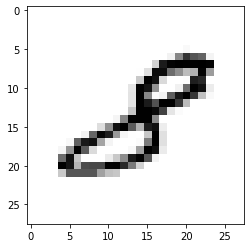

In [0]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()